**EXPLICACIÓN DEL DATA**

**El archivo Chest X-Ray Images (Pneumonia) es un conjunto de datos de imágenes de radiografías de tórax que se utilizan para entrenar y evaluar modelos de inteligencia artificial (IA) para la detección de neumonía. El conjunto de datos está organizado en tres carpetas:**
* **train: Contiene imágenes de rayos X de tórax de pacientes normales y con neumonía.**
* **test: Contiene imágenes de rayos X de tórax de pacientes normales y con neumonía.**
* **val: Contiene imágenes de rayos X de tórax de pacientes normales y con neumonía.**
**Cada una de las tres carpetas está subdividida en carpetas NORMAL y PNEUMONIA.**

**IMPORTANCIA DEL ANÁLISIS**

**El análisis de este conjunto de datos es importante por las siguientes razones:**

*   **Para mejorar la precisión de los modelos de IA para la detección de neumonía. Los modelos de IA se benefician de un conjunto de datos de entrenamiento grande y representativo. El archivo Chest X-Ray Images (Pneumonia) es un conjunto de datos grande y diverso que incluye imágenes de rayos X de pacientes de diferentes edades, géneros y etnias.**

*   **Para desarrollar nuevos métodos de detección de neumonía. Los modelos de IA pueden utilizarse para detectar neumonía en imágenes de rayos X de tórax de forma más precisa y eficiente que los métodos tradicionales. El análisis de este conjunto de datos puede ayudar a los investigadores a desarrollar nuevos métodos de detección de neumonía que sean más precisos y eficaces.**

**¿QUÉ ES LA NEUMONÍA?**

**La neumonía es una infección de los pulmones que causa inflamación y acumulación de líquido o pus en los sacos de aire (alvéolos). Los alvéolos son las estructuras en los pulmones donde se produce el intercambio de oxígeno y dióxido de carbono. Cuando los alvéolos están inflamados o llenos de líquido o pus, es difícil que el oxígeno llegue a la sangre.**

**La neumonía puede ser causada por bacterias, virus u hongos. Las bacterias son la causa más común de neumonía, seguidas de los virus. Los hongos son una causa menos común, pero pueden ser más graves, especialmente en personas con sistemas inmunitarios debilitados.**

**TRATAMIENTO DE LA NEUMONÍA**

**El tratamiento de la neumonía depende de la causa. La neumonía bacteriana suele tratarse con antibióticos. La neumonía viral suele curarse por sí sola, pero puede tratarse con medicamentos antivirales para aliviar los síntomas. La neumonía por hongos puede ser más grave y puede requerir medicamentos antifúngicos.**

**Hay algunas cosas que puede hacer para reducir su riesgo de contraer neumonía, como:**

*   **Vacunarse contra la influenza y la neumonía.**
*   **Lavarse las manos con frecuencia.**
*   **Evitar el contacto cercano con personas que estén enfermas.**
*  **Si fuma, dejar de fumar es una de las cosas más importantes que puede hacer para proteger sus pulmones.**

**¿CÓMO ES EL PROCESO DE ANÁLISIS DE LAS IMÁGENES?**

**El proceso de análisis de las imágenes de radiografías de tórax en este conjunto de datos es el siguiente:**

*   **Control de calidad: Todas las radiografías de tórax se examinan inicialmente para eliminar aquellas que son de baja calidad o ilegibles.**

*   **Clasificación por médicos expertos: Dos médicos expertos califican los diagnósticos de las imágenes.**

*   **Revisión por un tercer experto: Un tercer experto revisa el conjunto de evaluación para tener en cuenta posibles errores de calificación.**

**Este proceso de análisis garantiza que las imágenes de rayos X en el conjunto de datos sean de alta calidad y que los diagnósticos sean precisos.**

**IMPORTAR LIBRERÍAS**

**Las librerías son colecciones de código que se pueden utilizar para realizar tareas específicas. En el ámbito de la ciencia de datos, las librerías son importantes porque proporcionan una amplia gama de funciones para el manejo de datos, el aprendizaje automático, el análisis estadístico y la visualización de datos.**

In [3]:
%%capture
pip install scikit-learn

In [4]:
#Importar librerias
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os
import requests

In [6]:
%%capture
pip install tensorflow

In [7]:
%%capture
pip install seaborn

In [8]:
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras import optimizers

**RUTA ACCESO CARPETA**

**El siguiente código asigna la ruta a este directorio a la variable path. Esta variable se puede utilizar posteriormente para acceder a los archivos de imágenes de rayos X de tórax.**

In [11]:
# Obtenemos la ruta de acceso a la carpeta
path = 'D:\Data Science\Modulo 7\Proyecto 7\chest_xray'

In [12]:
%%capture
pip install os

**ANÁLISIS EXPLORATORIO Y LIMPIEZA DE LOS DATOS**

**IMPRIMIR CONTENIDO CARPETA: El siguiente código imprime una lista de los archivos y directorios que se encuentran en el directorio especificado por la variable path. Es decir, la función os.listdir() devuelve una lista de los nombres de los archivos y directorios que se encuentran en el directorio especificado por el parámetro path. La función print() imprime el contenido de la lista en la consola la cuál se muestra posterior a la ejecución del código.**

In [13]:
import os

# Imprimimos el contenido de la carpeta
print(os.listdir(path))

['chest_xray', 'test', 'train', 'val', '__MACOSX']


**RUTA ACCESO CONJUNTO DE DATOS: Los siguientes códigos no permite asignar la ruta de acceso al directorio de las variables train_path, val_path y test_path. Esto nos permitirá, posteriormente, acceder a los archivos de imágenes de rayos X de tórax que se utilizarán para el modelo.**

In [14]:
# Obtenemos la ruta de acceso a los conjuntos de datos
train_path = 'D:\Data Science\Modulo 7\Proyecto 7\chest_xray/train'
val_path = 'D:\Data Science\Modulo 7\Proyecto 7\chest_xray/val'
test_path = 'D:\Data Science\Modulo 7\Proyecto 7\chest_xray/test'

**CONTAR NÚMERO DE IMÁGENES: Los resultados los siguientes códigos sirven para contar el número de imágenes de cada clase en cada conjunto de datos. Estos resultados se pueden utilizar para evaluar la distribución de las clases en los conjuntos de datos. Posteriormente, se hace un print para conocer el número de imágenes en train normal, train pneumonía, val normal, val neumonía, test normal y test neumonía.**

In [15]:
# Contamos el número de imágenes de cada clase en cada conjunto de datos
num_train_normal = len(os.listdir(os.path.join(train_path, 'NORMAL')))
num_train_pneumonia = len(os.listdir(os.path.join(train_path, 'PNEUMONIA')))
num_val_normal = len(os.listdir(os.path.join(val_path, 'NORMAL')))
num_val_pneumonia = len(os.listdir(os.path.join(val_path, 'PNEUMONIA')))
num_test_normal = len(os.listdir(os.path.join(test_path, 'NORMAL')))
num_test_pneumonia = len(os.listdir(os.path.join(test_path, 'PNEUMONIA')))

In [16]:
print('Número de imágenes train normal:', num_train_normal)
print('Número de imágenes train pneumonia:', num_train_pneumonia)
print('Número de imágenes val normal:', num_val_normal)
print('Número de imágenes val pneumonia:', num_val_pneumonia)
print('Número de imágenes test_normal:', num_test_normal)
print('Número de imágenes test pneumonia:', num_test_pneumonia)

Número de imágenes train normal: 1341
Número de imágenes train pneumonia: 3875
Número de imágenes val normal: 8
Número de imágenes val pneumonia: 8
Número de imágenes test_normal: 234
Número de imágenes test pneumonia: 390


**El siguiente código es otra forma de revisar los contenidos de las carpetas y la cantidad de imágenes.**

In [17]:
# Imprimimos el número de imágenes de cada clase en cada conjunto de datos
print('Conjunto de datos de entrenamiento')
print(f'Normal: {num_train_normal}')
print(f'Neumonía: {num_train_pneumonia}')
print()
print('Conjunto de datos de validación')
print(f'Normal: {num_val_normal}')
print(f'Neumonía: {num_val_pneumonia}')
print()
print('Conjunto de datos de prueba')
print(f'Normal: {num_test_normal}')
print(f'Neumonía: {num_test_pneumonia}')

Conjunto de datos de entrenamiento
Normal: 1341
Neumonía: 3875

Conjunto de datos de validación
Normal: 8
Neumonía: 8

Conjunto de datos de prueba
Normal: 234
Neumonía: 390


**VISUALIZAR EL NOMBRE DE LAS CARPETAS: El código os.listdir nos devuelve una lista de los nombres de los archivos y directorios que se encuentran en el directorio especificado por el parámetro path. La función print imprime el contenido de la lista en la consola.**

In [20]:
print(os.listdir('D:\Data Science\Modulo 7\Proyecto 7\chest_xray'))

['chest_xray', 'test', 'train', 'val', '__MACOSX']


In [21]:
print(os.listdir('D:\Data Science\Modulo 7\Proyecto 7\chest_xray/train'))

['NORMAL', 'PNEUMONIA']


In [22]:
print(os.listdir('D:\Data Science\Modulo 7\Proyecto 7\chest_xray/test'))

['NORMAL', 'PNEUMONIA']


In [23]:
print(os.listdir('D:\Data Science\Modulo 7\Proyecto 7\chest_xray/val'))

['NORMAL', 'PNEUMONIA']


**LEER IMÁGENES**

**El código siguiente sirve para leer una imagen de cada conjunto de datos para fines de visualización o preprocesamiento.**

**Funciones utilizadas:**

*   **plt.imread(path): Esta función lee una imagen a partir de una ruta de archivo y la devuelve como un array de NumPy.**
*   **os.path.join(path1, path2, ...): Esta función une varias rutas de archivo en una sola ruta.**

**Posteriormente podemos observar las imágenes que podrían ser utilizadas para visualizar ejemplos de imágenes de cada clase y/o rreprocesar las imágenes antes de alimentarlas a un modelo de aprendizaje automático.**

In [24]:
import matplotlib.pyplot as plt

# Leemos una imagen de cada conjunto de datos
img_train_normal = plt.imread(os.path.join(train_path, 'NORMAL', 'IM-0249-0001.jpeg'))
img_train_pneumonia = plt.imread(os.path.join(train_path, 'PNEUMONIA', 'person101_virus_187.jpeg'))
img_val_normal = plt.imread(os.path.join(val_path, 'NORMAL', 'NORMAL2-IM-1436-0001.jpeg'))
img_val_pneumonia = plt.imread(os.path.join(val_path, 'PNEUMONIA', 'person1954_bacteria_4886.jpeg'))
img_test_normal = plt.imread(os.path.join(test_path, 'NORMAL', 'IM-0027-0001.jpeg'))
img_test_pneumonia = plt.imread(os.path.join(test_path, 'PNEUMONIA', 'person113_bacteria_541.jpeg'))

**El siguiente código nos sirve para mostrar las siguientes imagenes:**

*   **Imagen img_train_normal en la primera subfigura con el título "Normal (entrenamiento)".**
*   **Imagen img_train_pneumonia en la segunda subfigura con el título "Neumonía (entrenamiento)".**
*   **Imagen img_val_normal en la tercera subfigura con el título "Normal (validación)".**
*   **Imagen img_val_pneumonia en la cuarta subfigura con el título "Neumonía (validación)".**

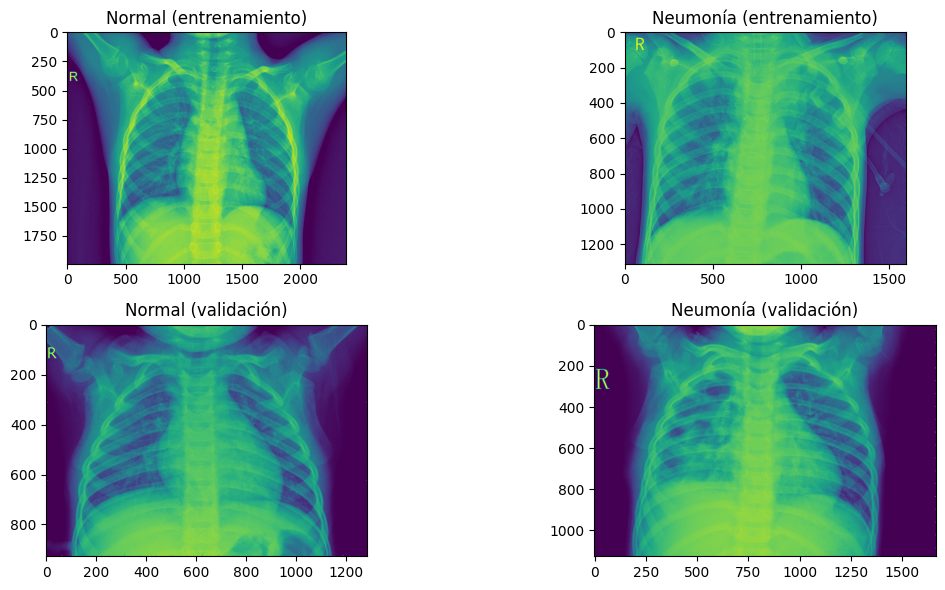

In [25]:
# Mostramos las imágenes
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(img_train_normal)
plt.title('Normal (entrenamiento)')
plt.subplot(2, 2, 2)
plt.imshow(img_train_pneumonia)
plt.title('Neumonía (entrenamiento)')
plt.subplot(2, 2, 3)
plt.imshow(img_val_normal)
plt.title('Normal (validación)')
plt.subplot(2, 2, 4)
plt.imshow(img_val_pneumonia)
plt.title('Neumonía (validación)')
plt.tight_layout()
plt.show()

**El siguiente código es muy similar al código anterior, pero en lugar de mostrar imágenes de los conjuntos de datos de entrenamiento y validación, muestra imágenes del conjunto de datos de prueba.**

*   **Muestra la imagen img_test_normal en la primera subfigura con el título "Normal (prueba)".**
*   **Muestra la imagen img_test_pneumonia en la segunda subfigura con el título "Neumonía (prueba)".**

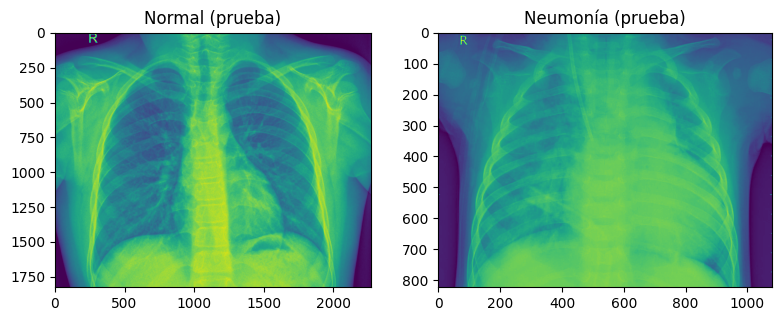

In [26]:
# mostrar las imágenes de prueba
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.imshow(img_test_normal)
plt.title('Normal (prueba)')
plt.subplot(2, 3, 2)
plt.imshow(img_test_pneumonia)
plt.title('Neumonía (prueba)')
plt.tight_layout()
plt.show()

**CREACIÓN DEL MODELO**

**El siguiente código asigna las rutas a los conjuntos de datos de entrenamiento, validación y prueba a las variables train_path, val_path y test_path, respectivamente.**

**Es decir, la variable train_path contiene la ruta al directorio de imágenes de rayos X de tórax de entrenamiento. La variable val_path contiene la ruta al directorio de imágenes de rayos X de tórax de validación. La variable test_path contiene la ruta al directorio de imágenes de rayos X de tórax de prueba.**

**Este código es importante porque permite al modelo acceder a los datos de entrenamiento, validación y prueba. Sin estas rutas, el modelo no podría leer las imágenes y realizar las tareas de aprendizaje automático.**

In [27]:
# Obtenemos la ruta de acceso a los conjuntos de datos
train_path = 'D:\Data Science\Modulo 7\Proyecto 7\chest_xray/train'
val_path = 'D:\Data Science\Modulo 7\Proyecto 7\chest_xray/val'
test_path = 'D:\Data Science\Modulo 7\Proyecto 7\chest_xray/test'

**Lo primero que hacemos es importar la clase ImageDataGenerator de TensorFlow Keras. Esta clase permite generar lotes de imágenes de manera eficiente a partir de directorios con subcarpetas para cada clase.**

**Segundo, definimos los parámetros de procesamiento. En este caso, batch_size, que establece el número de imágenes que se procesarán juntas en cada lote. En este caso, se procesarán 32 imágenes por lote y rescale, que normaliza la intensidad de píxel de las imágenes dividiendo cada valor por 255.**

**Por último, configuración de generadores con flow_from_directory:**

*   **flow_from_directory: Este método del ImageDataGenerator se encarga de leer las imágenes de los directorios especificados, aplicar el preprocesamiento y generar lotes de imágenes.**
*   **train_path, val_path, test_path: Especifican la ruta a los directorios de entrenamiento, validación y prueba, respectivamente.**
*   **target_size: Define el tamaño de redimensionamiento de las imágenes a (150, 150) píxeles.**
*   **class_mode: Indica cómo se codifican las etiquetas de las clases. En este caso, se asume que hay dos clases y se asignan como 0 y 1. Si hubiera más clases, se usaría "categorical".**

**¿Cuáles son los beneficios de usar generadores?**
*   **Eficiencia de memoria: Los generadores cargan las imágenes en lotes, evitando cargar todo el conjunto de datos a la vez, lo que ahorra memoria.**
*   **Aumenta la precisión: La mezcla de imágenes durante el entrenamiento (a través de generadores) ayuda a prevenir el sobreajuste y mejora la precisión del modelo.**
*   **Facilidad de uso: ImageDataGenerator permite la configuración sencilla de preprocesamiento y generación de lotes.**

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definir generadores de datos para entrenamiento, validación y prueba
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'  # O 'categorical' si hay más de dos clases
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


**ENTRENAR LOS DATOS CON UN MODELO 1**

**EXPLICACIÓN SIGUIENTE CÓDIGO:**

**El segundo entrenamiento lo entrenaremos en TensorFlow Keras. Lo primero es realizar las importaciones:**
*   **from tensorflow.keras.models import Sequential: Importa la clase Sequential para construir el modelo como una secuencia de capas.**
*   **from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense: Importa las capas que usarás en el modelo.**
*   **from tensorflow.keras.optimizers import Adam: Importa el optimizador Adam para entrenar el modelo.**

**Luego definimos el Modelo: model2 = Sequential: Crea una instancia del modelo model2 usando la clase Sequential y le pasa una lista de capas en el orden en que se deben apilar.**

**Explicación de las capas:**
*   **Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)). Esta capa convolucional tiene 64 filtros de tamaño 3x3 y aplica la función de activación relu. La entrada de la red tiene forma (150, 150, 3), que indica el ancho, alto y número de canales de la imagen (RGB).**
*   **MaxPooling2D((2, 2)): Aplica pooling máximo con un kernel de 2x2, reduciendo la resolución de la imagen a la mitad en cada dimensión.**
*   **Conv2D(64, (3, 3), activation='relu'). similar a la primera capa convolucional, pero con 128 filtros.**
*   **MaxPooling2D((2, 2)): similar a la capa anterior.**
*   **Flatten(): Aplana la salida de la capa convolucional a un vector de 1 dimensión.**
*   **Dense(64, activation='relu'): Capa densa con 128 neuronas y activación relu.**
*   **Dense(1, activation='sigmoid'): Capa de salida con 1 neurona y activación sigmoid. La salida de esta neurona será la predicción del modelo (entre 0 y 1).**

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Capa de salida para clasificación binaria
])

model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

**Vamos a entrenar con un primer modelo:**

**Definimos el número de épocas (epochs), en este caso son 10.**
**Método fit() del modelo, que entrena el modelo utilizando los generadores de entrenamiento y validación.**

**train_generator: El generador de entrenamiento que se utilizará para entrenar el modelo.**

**steps_per_epoch: El número de pasos por época. En este caso, cada época consistirá en recorrer todo el conjunto de datos de entrenamiento una vez.
epochs: El número de épocas.**

**validation_data: El generador de validación que se utilizará para evaluar el modelo durante el entrenamiento.**

**validation_steps: El número de pasos por época de validación. En este caso, cada época de validación consistirá en recorrer todo el conjunto de datos de validación una vez.**

In [82]:
# Entrenamiento del modelo
epochs = 10

history1 = model1.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

Epoch 1/10
163/163 [==============================] - 50s 298ms/step - loss: 0.2805 - accuracy: 0.8806 - val_loss: 0.3229 - val_accuracy: 0.8750
Epoch 2/10
163/163 [==============================] - 50s 305ms/step - loss: 0.1084 - accuracy: 0.9603 - val_loss: 0.1784 - val_accuracy: 0.9375
Epoch 3/10
163/163 [==============================] - 48s 294ms/step - loss: 0.0661 - accuracy: 0.9762 - val_loss: 0.1167 - val_accuracy: 0.9375
Epoch 4/10
163/163 [==============================] - 48s 295ms/step - loss: 0.0535 - accuracy: 0.9810 - val_loss: 0.0617 - val_accuracy: 1.0000
Epoch 5/10
163/163 [==============================] - 50s 305ms/step - loss: 0.0385 - accuracy: 0.9872 - val_loss: 0.0695 - val_accuracy: 0.9375
Epoch 6/10
163/163 [==============================] - 48s 294ms/step - loss: 0.0405 - accuracy: 0.9843 - val_loss: 0.5403 - val_accuracy: 0.8125
Epoch 7/10
163/163 [==============================] - 48s 293ms/step - loss: 0.0267 - accuracy: 0.9898 - val_loss: 0.6191 - val_ac

**GUARDAR MODELO**
**Al guardar los pesos del modelo de clasificación de rayos X de tórax en un archivo, nos permite utilizarlo más adelantes para ensamblar los modelos.**

In [83]:
model1.save_weights('model1_weights.h5')

**GRÁFICAS MODELO 1**

**El siguiente código sirve para graficar la evolución de la pérdida y la precisión del modelo de clasificación de rayos X de tórax durante el entrenamiento. La pérdida es una medida de la distancia entre las predicciones del modelo y las etiquetas reales. La precisión es una medida de la proporción de predicciones correctas realizadas por el modelo.**

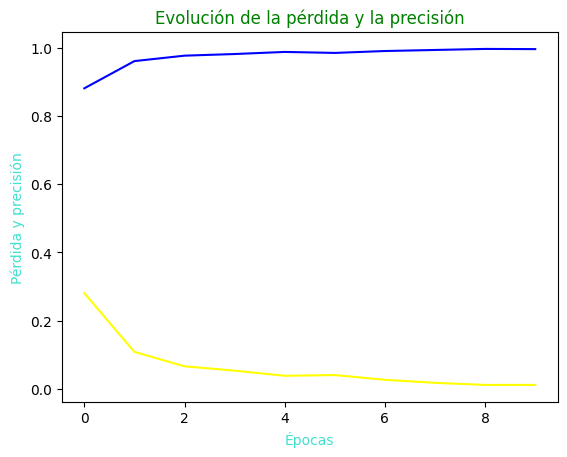

In [84]:
# Graficar la evolución de la pérdida y la precisión
plt.plot(history1.history["loss"], color='yellow')
plt.plot(history1.history["accuracy"], color='blue')
plt.title("Evolución de la pérdida y la precisión", color='green')
plt.xlabel("Épocas", color='turquoise')
plt.ylabel("Pérdida y precisión", color='turquoise')
plt.show()

**INTERPRETACIÓN GRÁFICO:**
**El gráfico muestra que la pérdida del modelo disminuye a medida que el modelo se entrena. Esto significa que el modelo está aprendiendo a hacer mejores predicciones a medida que se expone a más datos.**

**La precisión del modelo también aumenta a medida que el modelo se entrena. Esto significa que el modelo está aprendiendo a identificar correctamente las imágenes de rayos X de tórax con neumonía a medida que se expone a más datos.**

**GRÁFICO 2: El siguiente código sirve para graficar la evolución del error de validación del modelo de clasificación de rayos X de tórax durante el entrenamiento. Es otra forma de gráficar y observar como se comportan los datos.**

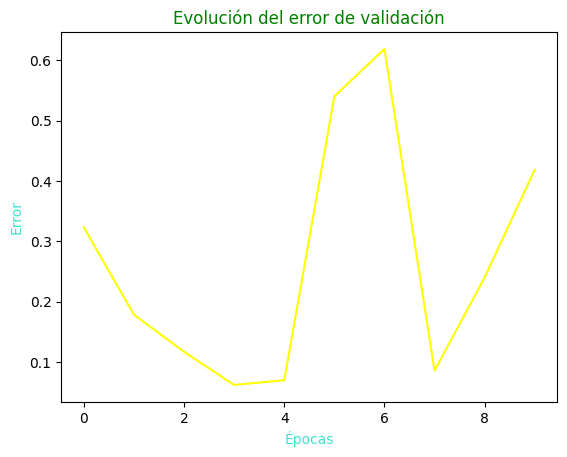

In [85]:
plt.plot(history1.history["val_loss"], color='yellow')
plt.title("Evolución del error de validación", color='green')
plt.xlabel("Épocas", color='turquoise')
plt.ylabel("Error", color='turquoise')
plt.show()

**INTERPRETACIÓN GRÁFICO: El gráfico muestra la evolución del error de validación del modelo de clasificación de rayos X de tórax durante el entrenamiento. El error de validación es una medida de la precisión del modelo en datos nuevos.**

**El gráfico muestra que el error de validación disminuye a medida que el modelo se entrena. Esto significa que el modelo está aprendiendo a hacer mejores predicciones en datos nuevos a medida que se expone a más datos.**

**GRÁFICO 3: El siguiente código sirve para graficar la evolución de la precisión de validación del modelo de clasificación de rayos X de tórax durante el entrenamiento.**

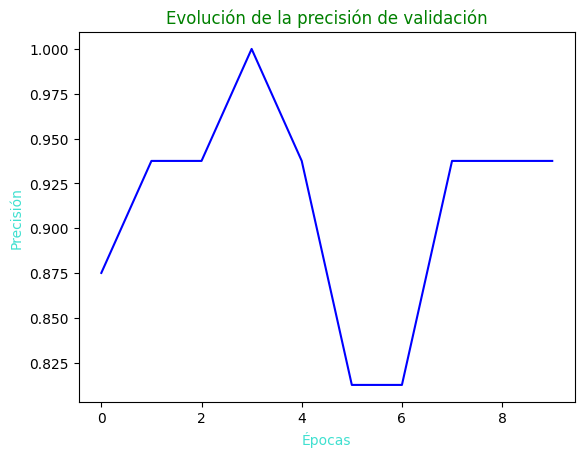

In [86]:
plt.plot(history1.history["val_accuracy"], color='blue')
plt.title("Evolución de la precisión de validación", color='green')
plt.xlabel("Épocas", color='turquoise')
plt.ylabel("Precisión", color='turquoise')
plt.show()

**INTERPRETACIÓN GRÁFICO: El gráfico muestra la evolución de la precisión del modelo de clasificación de rayos X de tórax en datos de entrenamiento y validación durante el entrenamiento. La precisión es una medida de la proporción de predicciones correctas realizadas por el modelo.**

**El gráfico muestra que la precisión del modelo en datos de entrenamiento aumenta a medida que el modelo se entrena. Esto significa que el modelo está aprendiendo a identificar correctamente las imágenes de rayos X de tórax con neumonía en los datos de entrenamiento.**

**PREDICCIÓN DEL MODELO**

**El código num_predictions = 10 establece el número de predicciones que se realizarán en el conjunto de datos de prueba. En este caso, se realizarán 10 predicciones.**
**El código test_images, test_labels = next(test_generator) obtiene 10 imágenes y sus etiquetas correspondientes del conjunto de datos de prueba.**
**Por último, el código predictions = model.predict(test_images) realiza las predicciones del modelo en las imágenes de prueba.**

In [35]:
# Predicciones con los datos de prueba
num_predictions = 10
test_images, test_labels = next(test_generator)

In [87]:
#Predicciones
predictions = model1.predict(test_images)

1/1 [==============================] - 0s 82ms/step


In [88]:
%%capture
pip install scikit-learn

In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

In [90]:
# Convertir las predicciones a etiquetas binarias (0 o 1)
binary_predictions = np.round(predictions)

In [91]:
# Obtener las etiquetas reales
y_true = test_labels

**MÉTRICAS MODELO 1**

**ACCURACY: accuracy_score(y_true, binary_predictions) calcula la precisión del modelo. La función accuracy_score() toma como entrada dos vectores, uno con las etiquetas reales y otro con las predicciones del modelo. La función devuelve la proporción de predicciones correctas realizadas por el modelo.**

In [92]:
# Calcular la precisión
accuracy = accuracy_score(y_true, binary_predictions)
print("Accuracy:", accuracy)

Accuracy: 0.75


**INTERPRETACIÓN RESULTADO: El resultado de la función accuracy_score() es 0.75, lo que significa que el modelo realizó correctamente el 75% de las predicciones.**

**PRECISIÓN: precision_score(y_true, binary_predictions) calcula la precisión del modelo. La función devuelve la proporción de predicciones correctas realizadas por el modelo, donde solo se consideran las predicciones positivas.**

In [93]:
# Calcular la precisión
precision = precision_score(y_true, binary_predictions)
print("Precision:", precision)

Precision: 0.7142857142857143


**INTERPRETACIÓN RESULTADO: El resultado de la función precision_score() es 0.6538, lo que significa que el modelo realizó correctamente el 65.85% de las predicciones positivas.**

**RECALL: recall_score(y_true, binary_predictions) calcula el recall del modelo. La función devuelve la proporción de etiquetas positivas reales que fueron predichas correctamente por el modelo.**

In [43]:
# Calcular el recall
recall = recall_score(y_true, binary_predictions)
print("Recall:", recall)

Recall: 1.0


**INTERPRETACIÓN RESULTADO: El resultado de la función recall_score() es 1.0, lo que significa que el modelo predijo correctamente todas las etiquetas positivas reales.**

**F1-SCORE: f1_score(y_true, binary_predictions) calcula el F1-score del modelo. La función devuelve una medida del equilibrio entre la precisión y el recall del modelo.**

In [44]:
# Calcular el F1-score
f1 = f1_score(y_true, binary_predictions)
print("F1 Score:", f1)

F1 Score: 0.7906976744186047


**INTERPRETACIÓN RESULTADO: El resultado de la función f1_score() es 0.7907, lo que significa que el modelo tiene un equilibrio razonable entre la precisión y el recall.**

**MATRIZ DE CONFUSIÓN: confusion_matrix(y_true, binary_predictions) crea una matriz de confusión para un modelo de clasificación binaria. La matriz de confusión es una tabla que resume el rendimiento del modelo en términos de las predicciones correctas e incorrectas que realiza.**
**La matriz de confusión tiene cuatro celdas, una para cada combinación de predicción y etiqueta real. Las celdas de la esquina superior izquierda y la esquina inferior derecha representan las predicciones correctas, mientras que las celdas de la esquina superior derecha y la esquina inferior izquierda representan las predicciones incorrectas.**
**GRÁFICO: El código usa la función sns.heatmap() para crear el mapa de calor. En este caso, el código usa las siguientes opciones:**
**annot=True indica que se deben mostrar los valores de la matriz de confusión en el mapa de calor.**
**fmt='d' indica que los valores se deben mostrar como números enteros.**
**cmap='Blues' indica que se debe usar la paleta de colores "Blues".**
**xticklabels=labels indica que las etiquetas de los ejes x deben ser las etiquetas definidas anteriormente.**
**yticklabels=labels indica que las etiquetas de los ejes y deben ser las etiquetas definidas anteriormente.**
**Finalmente, el código usa la función plt.show() para mostrar el mapa de calor.****

In [45]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_true, binary_predictions)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 6  9]
 [ 0 17]]


**INTERPRETACIÓN: En esta matriz, el modelo nos predijo imágenes de rayos X de tórax sin neumonía y e imágenes de rayos X de tórax con neumonía. También el modelo muestra la predicción incorrecta de imágenes de rayos X de tórax sin neumonía como imágenes con neumonía e imagen de rayos X de tórax con neumonía como imagen sin neumonía.**

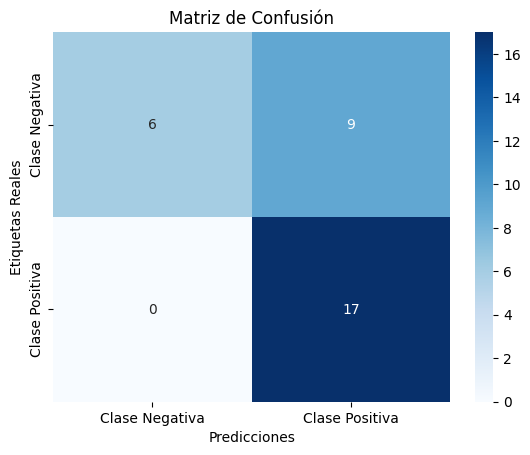

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir etiquetas para los ejes
labels = ['Clase Negativa', 'Clase Positiva']

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_true, binary_predictions)

# Crear el mapa de calor
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Configuraciones adicionales para mejorar la visualización
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Reales')
plt.show()

**INTERPRETACIÓN GRÁFICO: El modelo predijo incorrectamente dos imágenes de rayos X de tórax sin neumonía como imágenes con neumonía. Esto podría deberse a que las imágenes de rayos X de tórax sin neumonía pueden tener algunas características similares a las imágenes de rayos X de tórax con neumonía.**
**En general, el modelo tiene un rendimiento bueno en la clasificación de imágenes de rayos X de tórax. Sin embargo, es importante tener en cuenta las limitaciones del modelo y tomar precauciones al usar el modelo para tomar decisiones clínicas.**

**VISUALIZACIÓN DE IMÁGENES**

**El siguiente código mostrará una figura con 2 filas y 5 columnas de sub-plots, cada uno mostrando una imagen junto con la predicción correspondiente del modelo. Esto permite visualizar rápidamente un conjunto de imágenes con sus predicciones asociadas para evaluar el rendimiento del modelo.**

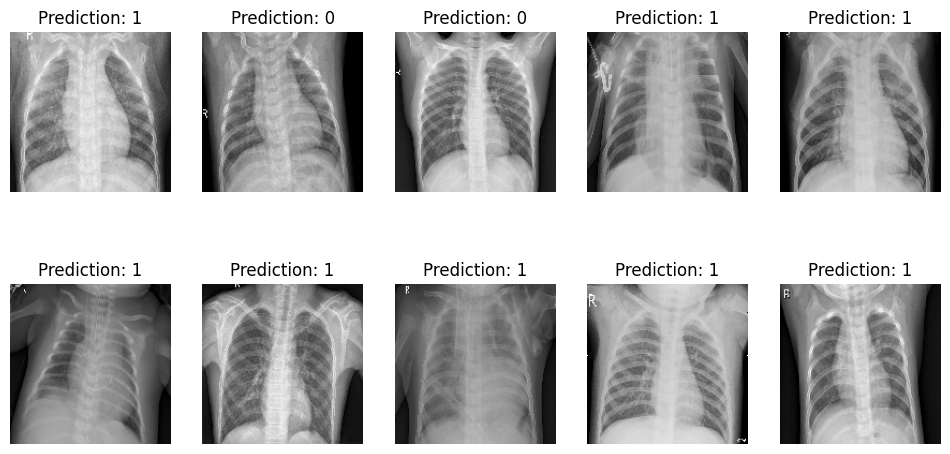

In [47]:
# Imágenes con predicciones correspondientes
plt.figure(figsize=(12, 6))
for i in range(num_predictions):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i])
    plt.title(f"Prediction: {round(predictions[i][0])}")
    plt.axis('off')

In [48]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

**ENTRENAR LOS DATOS CON UN MODELO 2**

**EXPLICACIÓN SIGUIENTE CÓDIGO:**

**El segundo entrenamiento lo entrenaremos en TensorFlow Keras. Lo primero es realizar las importaciones:**
*   **from tensorflow.keras.models import Sequential: Importa la clase Sequential para construir el modelo como una secuencia de capas.**
*   **from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense: Importa las capas que usarás en el modelo.**
*   **from tensorflow.keras.optimizers import Adam: Importa el optimizador Adam para entrenar el modelo.**

**Luego definimos el Modelo: model2 = Sequential: Crea una instancia del modelo model2 usando la clase Sequential y le pasa una lista de capas en el orden en que se deben apilar.**

**Explicación de las capas:**
*   **Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)). Esta capa convolucional tiene 64 filtros de tamaño 3x3 y aplica la función de activación relu. La entrada de la red tiene forma (150, 150, 3), que indica el ancho, alto y número de canales de la imagen (RGB).**
*   **MaxPooling2D((2, 2)): Aplica pooling máximo con un kernel de 2x2, reduciendo la resolución de la imagen a la mitad en cada dimensión.**
*   **Conv2D(128, (3, 3), activation='relu'). similar a la primera capa convolucional, pero con 128 filtros.**
*   **MaxPooling2D((2, 2)): similar a la capa anterior.**
*   **Flatten(): Aplana la salida de la capa convolucional a un vector de 1 dimensión.**
*   **Dense(128, activation='relu'): Capa densa con 128 neuronas y activación relu.**
*   **Dense(1, activation='sigmoid'): Capa de salida con 1 neurona y activación sigmoid. La salida de esta neurona será la predicción del modelo (entre 0 y 1).**

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Modelo 2
model2 = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

**El siguiente código compila el modelo model2 que definimos anteriormente. Es decir, el código configura el modelo model2 para que se entrene con el optimizador Adam, utilizando la pérdida de entropia cruzada binaria y evaluando el rendimiento con la métrica de precisión.**

**optimizer='adam': El optimizador que se usará para entrenar el modelo. En este caso, se usa el optimizador Adam, que es un optimizador de gradiente descendente estocástico (SGD) con momentum y una tasa de aprendizaje adaptativa.**

**loss='binary_crossentropy': La función de pérdida que se usará para medir el error del modelo. En este caso, se usa la pérdida de entropia cruzada binaria, que es adecuada para problemas de clasificación binaria.**

**metrics=['accuracy']: Las métricas que se usarán para evaluar el rendimiento del modelo. En este caso, solo se usa la métrica de precisión, que mide la proporción de predicciones correctas.**

In [50]:
model2.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

 **ENTRENAMIENTO: El siguietne código no permite entrenar el modelo model2 que definimos anteriormente.**

1.   **epochs = 10: Esta línea define el número de épocas para el entrenamiento. Una época es un ciclo completo de aprendizaje a través de todo el conjunto de datos de entrenamiento. Aquí se establecen 10 épocas, lo que significa que el modelo pasará 10 veces por todo el conjunto de entrenamiento para aprender las características de los datos.**
2.   **history2 = model2.fit(...): Esta línea ejecuta el método fit() del modelo. Este método es el que se encarga de entrenar el modelo, y a su vez, devuelve un objeto llamado history2 que contiene información sobre el proceso de entrenamiento.**
3.   **train_generator, steps_per_epoch=len(train_generator): Estos argumentos especifican los datos de entrenamiento que se usarán. train_generator es un objeto que genera lotes de datos de entrenamiento (imágenes y etiquetas) en cada iteración del bucle de entrenamiento. steps_per_epoch indica el número total de lotes que se usarán en una época. Aquí, se establece que se use todo el conjunto de entrenamiento en cada época (len(train_generator)) para aprovechar al máximo los datos disponibles.**

4.   **epochs=epochs: Este argumento repite el valor de epochs definido previamente, asegurándose de que el entrenamiento se realice durante el número de épocas especificado.**

5.   **validation_data=val_generator, validation_steps=len(val_generator): Estos argumentos especifican los datos de validación que se usarán para evaluar el rendimiento del modelo durante el entrenamiento. val_generator es similar a train_generator, pero genera lotes de datos de validación. validation_steps indica el número de lotes que se usarán para la validación en cada época. Aquí, se usa todo el conjunto de validación en cada época para obtener una evaluación más representativa del rendimiento del modelo.**

In [51]:
# Entrenar Modelo 2
epochs = 10

history2 = model2.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

Epoch 1/10
163/163 [==============================] - 85s 519ms/step - loss: 0.2517 - accuracy: 0.9041 - val_loss: 0.3852 - val_accuracy: 0.8750
Epoch 2/10
163/163 [==============================] - 82s 501ms/step - loss: 0.0967 - accuracy: 0.9651 - val_loss: 0.7434 - val_accuracy: 0.6875
Epoch 3/10
163/163 [==============================] - 83s 508ms/step - loss: 0.0624 - accuracy: 0.9768 - val_loss: 0.3382 - val_accuracy: 0.8125
Epoch 4/10
163/163 [==============================] - 84s 512ms/step - loss: 0.0522 - accuracy: 0.9803 - val_loss: 0.3292 - val_accuracy: 0.8125
Epoch 5/10
163/163 [==============================] - 83s 509ms/step - loss: 0.0341 - accuracy: 0.9852 - val_loss: 0.0173 - val_accuracy: 1.0000
Epoch 6/10
163/163 [==============================] - 81s 494ms/step - loss: 0.0239 - accuracy: 0.9916 - val_loss: 0.2067 - val_accuracy: 0.9375
Epoch 7/10
163/163 [==============================] - 80s 492ms/step - loss: 0.0121 - accuracy: 0.9958 - val_loss: 0.0268 - val_ac

**El código siguiente llama al método save_weights() del modelo, que guarda los pesos del modelo en un archivo. El archivo se guardará en la ruta especificada por el parámetro filepath. En este caso, el archivo se guardará como model2_weights.h5. Realizamos el mismo procedimiento para el modelo 1.**

In [52]:
model2.save_weights('model2_weights.h5')

**GRAFICAS, PREDICCIÓN Y MÉTRICAS DE RENDIMIENTO DEL MODELO 2**

**El siguiente código sirve para graficar la evolución de la pérdida y la precisión del modelo de clasificación de rayos X de tórax durante el entrenamiento. La pérdida es una medida de la distancia entre las predicciones del modelo y las etiquetas reales. La precisión es una medida de la proporción de predicciones correctas realizadas por el modelo.**

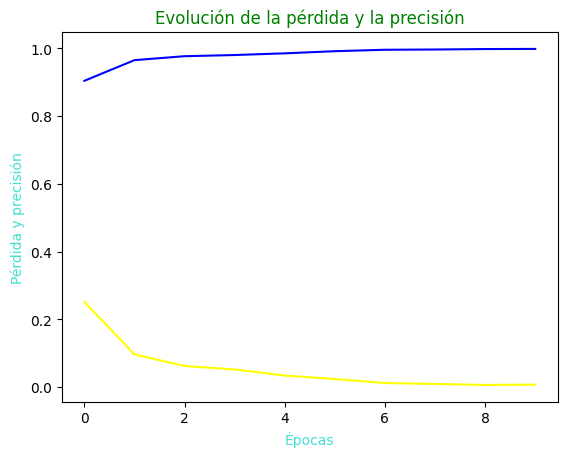

In [53]:
# Graficar la evolución de la pérdida y la precisión
plt.plot(history2.history["loss"], color='yellow')
plt.plot(history2.history["accuracy"], color='blue')
plt.title("Evolución de la pérdida y la precisión", color='green')
plt.xlabel("Épocas", color='turquoise')
plt.ylabel("Pérdida y precisión", color='turquoise')
plt.show()

**INTERPRETACIÓN GRÁFICO:**
**La pérdida del modelo disminuye a medida que el modelo se entrena. Esto significa que el modelo está aprendiendo a hacer mejores predicciones a medida que se expone a más datos.**
**También, precisión del modelo también aumenta a medida que el modelo se entrena. Esto significa que el modelo está aprendiendo a identificar correctamente las imágenes de rayos X de tórax con neumonía a medida que se expone a más datos.**
**Es muy similar al modelo 1.**

**GRÁFICO 2: El siguiente código sirve para graficar la evolución del error de validación del modelo de clasificación de rayos X de tórax durante el entrenamiento. Es otra forma de gráficar y observar como se comportan los datos.**

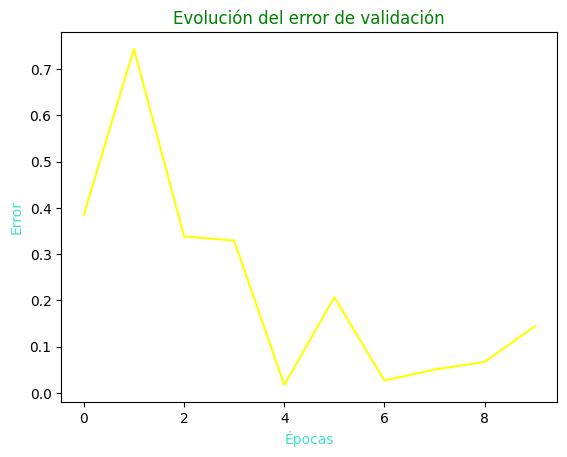

In [54]:
plt.plot(history2.history["val_loss"], color='yellow')
plt.title("Evolución del error de validación", color='green')
plt.xlabel("Épocas", color='turquoise')
plt.ylabel("Error", color='turquoise')
plt.show()

**INTERPRETACIÓN GRÁFICO: El gráfico muestra que el error de validación disminuye a medida que el modelo se entrena. Esto significa que el modelo está aprendiendo a hacer mejores predicciones en datos nuevos a medida que se expone a más datos.**

**GRÁFICO 3: El siguiente código sirve para graficar la evolución de la precisión de validación del modelo de clasificación de rayos X de tórax durante el entrenamiento.**

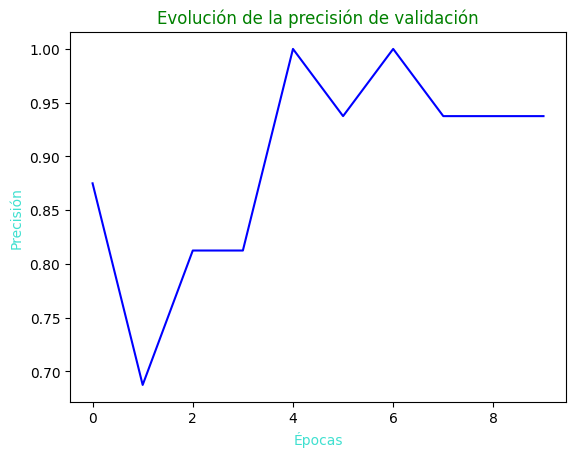

In [55]:
plt.plot(history2.history["val_accuracy"], color='blue')
plt.title("Evolución de la precisión de validación", color='green')
plt.xlabel("Épocas", color='turquoise')
plt.ylabel("Precisión", color='turquoise')
plt.show()

**INTERPRETACIÓN GRÁFICO: El gráfico muestra que la precisión del modelo en datos de entrenamiento aumenta a medida que el modelo se entrena. Esto significa que el modelo está aprendiendo a identificar correctamente las imágenes de rayos X de tórax con neumonía en los datos de entrenamiento.**

**PREDICCIONES DEL MODELO: El siguiente código predictions = model2.predict(test_images) nos permitira realizar las predicciones del modelo en las imágenes de prueba.**

In [56]:
# Predicciones con los datos de prueba
num_predictions2 = 10
test_images, test_labels = next(test_generator)

#Predicciones
predictions2 = model2.predict(test_images)

1/1 [==============================] - 0s 142ms/step


In [57]:
# Convertir las predicciones a etiquetas binarias (0 o 1)
binary_predictions2 = np.round(predictions2)

In [58]:
# Obtener las etiquetas reales
y_true2 = test_labels

In [59]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_true2, binary_predictions2)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 5  5]
 [ 0 22]]


**INTERPRETACIÓN: En esta matriz, el modelo nos predijo imágenes de rayos X de tórax sin neumonía y e imágenes de rayos X de tórax con neumonía. También el modelo muestra la predicción incorrecta de imágenes de rayos X de tórax sin neumonía como imágenes con neumonía e imagen de rayos X de tórax con neumonía como imagen sin neumonía.**

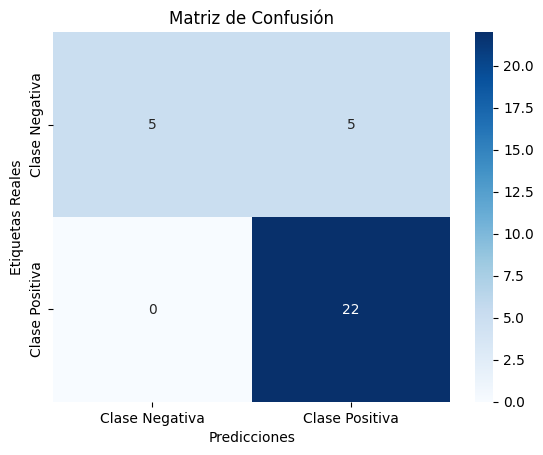

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir etiquetas para los ejes
labels = ['Clase Negativa', 'Clase Positiva']

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_true2, binary_predictions2)

# Crear el mapa de calor
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Configuraciones adicionales para mejorar la visualización
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Reales')
plt.show()

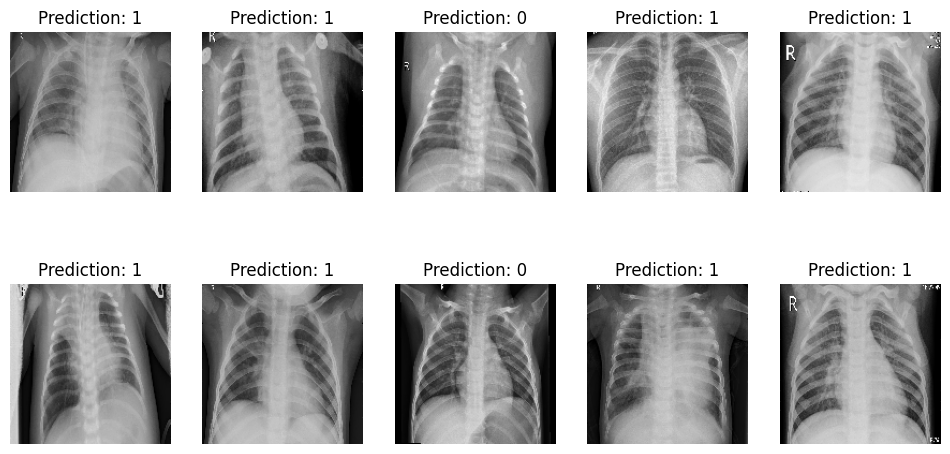

In [61]:
# Imágenes con predicciones correspondientes
plt.figure(figsize=(12, 6))
for i in range(num_predictions2):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i])
    plt.title(f"Prediction: {round(predictions2[i][0])}")
    plt.axis('off')

**CÁLCULO DE MÉTRICAS:**

**ACCURACY: La función accuracy_score() devuelve la proporción de predicciones correctas realizadas por el modelo.**

In [62]:
# Calcular la precisión
accuracy2 = accuracy_score(y_true2, binary_predictions2)
print("Accuracy:", accuracy2)

Accuracy: 0.84375


**INTERPRETACIÓN 84.375% de las predicciones. Si lo comparamos con el modelo 1, este tiene un mejor accuracy.**

**PRECISIÓN: precision_score(y_true, binary_predictions) devuelve la proporción de predicciones correctas realizadas por el modelo, donde solo se consideran las predicciones positivas.**

In [63]:
# Calcular la precisión
precision2 = precision_score(y_true2, binary_predictions2)
print("Precision:", precision2)

Precision: 0.8148148148148148


**INTERPRETACIÓN RESULTADO: El resultado de la función precision_score() es 0.8148, lo que significa que el modelo realizó correctamente el 81.48% de las predicciones positivas. Al igual que el Accuracy, este modelo tiene una mejor precisión que el modelo 1.**

**RECALL: recall_score(y_true, binary_predictions) devuelve la proporción de etiquetas positivas reales que fueron predichas correctamente por el modelo.**

In [64]:
# Calcular el recall
recall2 = recall_score(y_true2, binary_predictions2)
print("Recall:", recall2)

Recall: 1.0


**INTERPRETACIÓN RESULTADO: El resultado de la función recall_score() es 1.0, lo que significa que el modelo predijo correctamente todas las etiquetas positivas reales. El modelo 1 igual tiene un 1.0.**

**ENTRENAR LOS DATOS CON UN MODELO 3**

**model3 = Sequential([ ... ]): Es similar al Modelo 2, esta línea crea una instancia del modelo model3 usando la clase Sequential y le pasa una lista de capas en el orden en que se deben apilar.**

**Explicación de las capas:**

*   **Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)): Esta capa convolucional tiene 32 filtros de tamaño 3x3 y aplica la función de activación relu. La entrada de la red sigue siendo la misma (150, 150, 3).**
*   **MaxPooling2D((2, 2)): Similar al Modelo 2, aplica pooling máximo con un kernel de 2x2, reduciendo la resolución de la imagen a la mitad en cada dimensión.**
*   **Conv2D(128, (3, 3), activation='relu') x 2: Se repite la misma capa convolucional dos veces más, extrayendo aún más características de la imagen.**
*   **MaxPooling2D((2, 2)): Se aplica nuevamente pooling máximo dos veces más, reduciendo la resolución final a 18x18.**
*   **Flatten(): Aplana la salida de la capa convolucional a un vector.**
*   **Dense(128, activation='relu'): Capa densa con 32 neuronas y activación relu.**
*   **Dense(1, activation='sigmoid'): Capa de salida con 1 neurona y activación sigmoid. La salida de esta neurona será la predicción del modelo (entre 0 y 1).**

In [65]:
# Modelo 3
model3 = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

**El siguiente código compila el modelo model3 que definimos anteriormente. Es similar al código que compilaste para el Modelo 2.**
**optimizer='adam': El optimizador se establece en adam en lugar de rmsprop. adam es un optimizador más moderno que suele ser más eficiente y preciso que rmsprop.**
**loss='binary_crossentropy': La función de pérdida se establece en binary_crossentropy en lugar de categorical_crossentropy. binary_crossentropy es la función de pérdida adecuada para problemas de clasificación binaria, como el que estamos resolviendo.**
**metrics=['accuracy', 'AUC']: Las métricas se establecen en ['accuracy', 'AUC'] en lugar de ['accuracy']. AUC (Área bajo la curva ROC) es una métrica adicional que se puede usar para evaluar el rendimiento del modelo.**

In [66]:
model3.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [67]:
# Entrenar Modelo 3
history3 = model3.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

Epoch 1/10
163/163 [==============================] - 111s 676ms/step - loss: 0.2557 - accuracy: 0.8967 - val_loss: 0.2263 - val_accuracy: 0.8125
Epoch 2/10
163/163 [==============================] - 111s 680ms/step - loss: 0.1057 - accuracy: 0.9618 - val_loss: 0.4455 - val_accuracy: 0.8125
Epoch 3/10
163/163 [==============================] - 111s 681ms/step - loss: 0.0872 - accuracy: 0.9686 - val_loss: 0.1069 - val_accuracy: 1.0000
Epoch 4/10
163/163 [==============================] - 107s 656ms/step - loss: 0.0586 - accuracy: 0.9776 - val_loss: 0.2459 - val_accuracy: 0.8750
Epoch 5/10
163/163 [==============================] - 108s 665ms/step - loss: 0.0505 - accuracy: 0.9810 - val_loss: 0.2584 - val_accuracy: 0.8125
Epoch 6/10
163/163 [==============================] - 106s 649ms/step - loss: 0.0512 - accuracy: 0.9801 - val_loss: 0.1846 - val_accuracy: 0.8750
Epoch 7/10
163/163 [==============================] - 111s 679ms/step - loss: 0.0332 - accuracy: 0.9870 - val_loss: 0.2050 -

**El código siguiente llama al método save_weights() del modelo, que guarda los pesos del modelo en un archivo. En este caso, el archivo se guardará como model3_weights.h5.**

In [68]:
model3.save_weights('model3_weights.h5')

**GRAFICAS, PREDICCIÓN Y MÉTRICAS DE RENDIMIENTO DEL MODELO 3**

**El siguiente código sirve para graficar la evolución de la pérdida y la precisión del modelo de clasificación de rayos X de tórax durante el entrenamiento.**

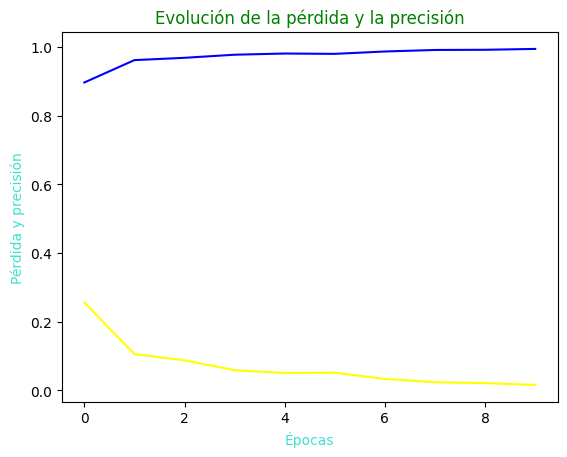

In [69]:
# Graficar la evolución de la pérdida y la precisión
plt.plot(history3.history["loss"], color='yellow')
plt.plot(history3.history["accuracy"], color='blue')
plt.title("Evolución de la pérdida y la precisión", color='green')
plt.xlabel("Épocas", color='turquoise')
plt.ylabel("Pérdida y precisión", color='turquoise')
plt.show()

**INTERPRETACIÓN GRÁFICO:**
**Al igual que los modelos anteriores, el gráfico muestra que la pérdida del modelo disminuye a medida que el modelo se entrena. Esto significa que el modelo está aprendiendo a hacer mejores predicciones a medida que se expone a más datos.**

**La precisión del modelo también aumenta a medida que el modelo se entrena. Esto significa que el modelo está aprendiendo a identificar correctamente las imágenes de rayos X de tórax con neumonía a medida que se expone a más datos.**

**GRÁFICO 2: El siguiente código sirve para graficar la evolución del error de validación del modelo de clasificación de rayos X de tórax durante el entrenamiento.**

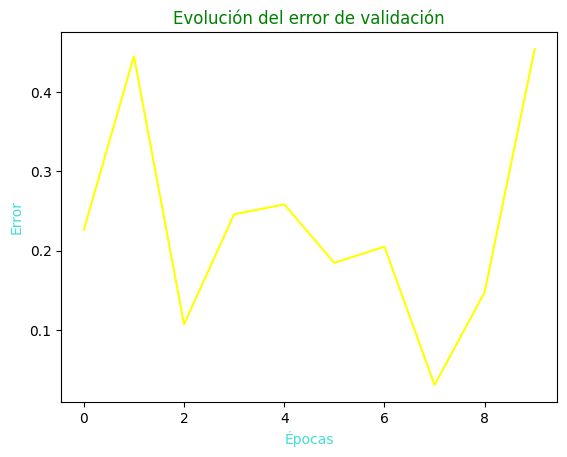

In [70]:
plt.plot(history3.history["val_loss"], color='yellow')
plt.title("Evolución del error de validación", color='green')
plt.xlabel("Épocas", color='turquoise')
plt.ylabel("Error", color='turquoise')
plt.show()

**INTERPRETACIÓN GRÁFICO: El gráfico muestra que el error de validación disminuye a medida que el modelo se entrena. Esto significa que el modelo está aprendiendo a hacer mejores predicciones en datos nuevos a medida que se expone a más datos.**

**GRÁFICO 3: El siguiente código sirve para graficar la evolución de la precisión de validación del modelo de clasificación de rayos X de tórax durante el entrenamiento.**

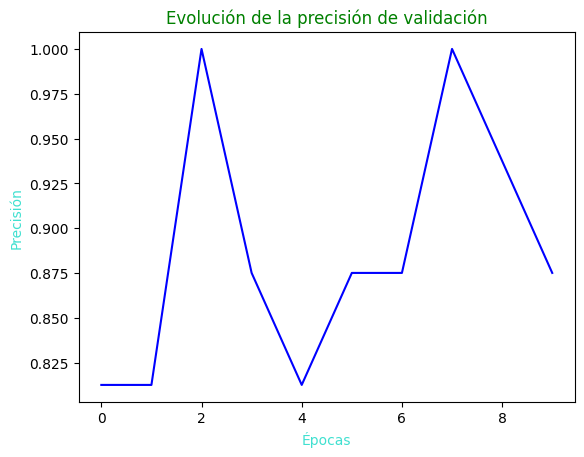

In [71]:
plt.plot(history3.history["val_accuracy"], color='blue')
plt.title("Evolución de la precisión de validación", color='green')
plt.xlabel("Épocas", color='turquoise')
plt.ylabel("Precisión", color='turquoise')
plt.show()

**INTERPRETACIÓN GRÁFICO: El gráfico muestra que la precisión del modelo en datos de entrenamiento aumenta a medida que el modelo se entrena. Esto significa que el modelo está aprendiendo a identificar correctamente las imágenes de rayos X de tórax con neumonía en los datos de entrenamiento.**

**PREDICCIONES DEL MODELO: El código código predictions3 = model3.predict(test_images) realiza las predicciones del modelo en las imágenes de prueba.**

In [72]:
# Predicciones con los datos de prueba
num_predictions3 = 10
test_images, test_labels = next(test_generator)

#Predicciones
predictions3 = model3.predict(test_images)

1/1 [==============================] - 0s 249ms/step


In [73]:
# Convertir las predicciones a etiquetas binarias (0 o 1)
binary_predictions3 = np.round(predictions3)

In [74]:
# Obtener las etiquetas reales
y_true3 = test_labels

**CÁLCULO DE MÉTRICAS:**

**ACCURACY: La función accuracy_score() toma como entrada dos vectores, uno con las etiquetas reales y otro con las predicciones del modelo. La función devuelve la proporción de predicciones correctas realizadas por el modelo.**

In [75]:
# Calcular la precisión
accuracy3 = accuracy_score(y_true3, binary_predictions3)
print("Accuracy:", accuracy3)

Accuracy: 0.71875


**INTERPRETACIÓN RESULTADO: El resultado de la función accuracy_score() es 0.71875, lo que significa que el modelo realizó correctamente el 71.875% de las predicciones.**

**PRECISIÓN: La siguiente función devuelve la proporción de predicciones correctas realizadas por el modelo, donde solo se consideran las predicciones positivas.**

In [76]:
# Calcular la precisión
precision3 = precision_score(y_true3, binary_predictions3)
print("Precision:", precision3)

Precision: 0.6896551724137931


**INTERPRETACIÓN RESULTADO: El resultado de la función precision_score() es 0.6897, lo que significa que el modelo realizó correctamente el 68.97% de las predicciones positivas.**

**RECALL: La función devuelve la proporción de etiquetas positivas reales que fueron predichas correctamente por el modelo.**

In [77]:
# Calcular el recall
recall3 = recall_score(y_true3, binary_predictions3)
print("Recall:", recall3)

Recall: 1.0


**MATRIZ DE CONFUSIÓN:**

**Calcularemos y graficaremos la matriz de confusión del modelo ensamblado. La matriz de confusión es una tabla que muestra la distribución de las predicciones del modelo en comparación con las etiquetas reales.**

In [78]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_true3, binary_predictions3)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 3  9]
 [ 0 20]]


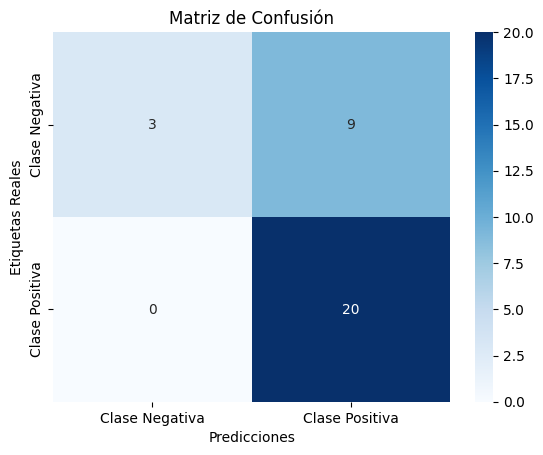

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir etiquetas para los ejes
labels = ['Clase Negativa', 'Clase Positiva']

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_true3, binary_predictions3)

# Crear el mapa de calor
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Configuraciones adicionales para mejorar la visualización
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Reales')
plt.show()

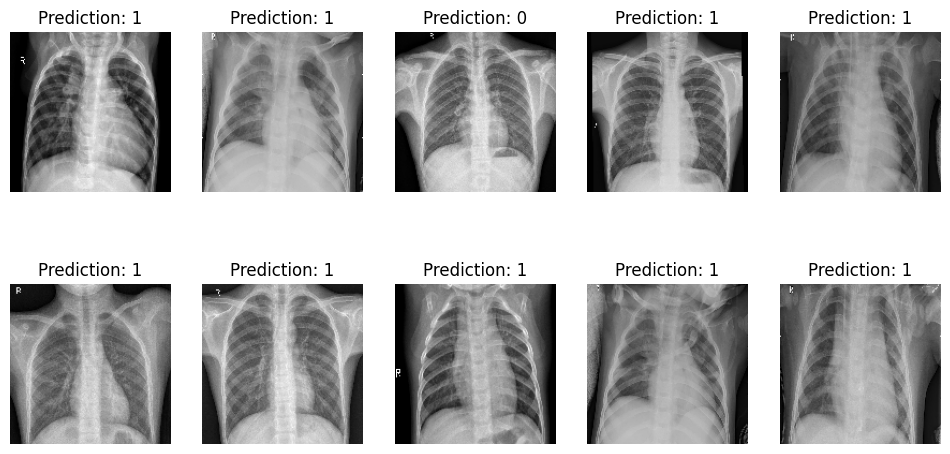

In [80]:
# Imágenes con predicciones correspondientes
plt.figure(figsize=(12, 6))
for i in range(num_predictions3):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i])
    plt.title(f"Prediction: {round(predictions3[i][0])}")
    plt.axis('off')

**CONCLUSIÓN: De acuerdo a las métricas, el modelo 2 es el que es más eficiente. Creo que si hubiera realizado más epochs para el entrenamiento, el modelo se hubiese vuelto más efectivo. Creo con un número pequeño de épocas (en este caso 10) y luego aumentarlo gradualmente hasta que el rendimiento del modelo deje de mejorar, hubiese sido una buena opción.**

**En el caso de los modelos de redes neuronales convolucionales, el número óptimo de épocas puede variar según el tamaño y la complejidad del conjunto de datos, la arquitectura del modelo y otros factores. En general, los modelos CNN pueden requerir más épocas que otros tipos de modelos de aprendizaje automático.**

**ENSAMBLADO Y AJUSTE DE HIPERPARÁMETROS**

**CARGAR LOS TRES MODELOS:**

**El siguiente código nos permite para cargar los tres modelos de redes neuronales convolucionales entrenados previamente: model1, model2, y model3.**

**1. Importaciones: from tensorflow.keras.models import Sequential, load_model: Importa las funciones Sequential para crear modelos CNNs y load_model para cargar modelos previamente guardados.**

**2. Definición de los modelos: Se definen tres modelos CNNs model1, model2, y model3 cada uno con una arquitectura específica (secuencias de capas convolucionales, pooling, capas densas, etc.).**

**3. Carga de pesos: model1.load_weights('model1_weights.h5'): Carga los pesos previamente entrenados del modelo model1 desde el archivo model1_weights.h5. model2.load_weights('model2_weights.h5'): similarmente, carga los pesos del modelo model2 desde su propio archivo de pesos. model3.load_weights('model3_weights.h5'): similarmente, carga los pesos del modelo model3 desde su propio archivo de pesos.**

In [156]:
from tensorflow.keras.models import Sequential, load_model
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Cargar modelos
model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model1.load_weights('model1_weights.h5')

model2 = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
model2.load_weights('model2_weights.h5')

model3 = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
model3.load_weights('model3_weights.h5')

**PROCESO DE HIPERPARÁMETROS (TUNING)**

**El proceso de tuning nos sirve para mejorar el rendimiento de los modelos de aprendizaje automático. El tuning consiste en ajustar los parámetros de los modelos para que estos funcionen mejor en un conjunto de datos específico.**

In [143]:
%%capture
pip install keras-tuner

In [113]:
%%capture
pip install tensorflow-keras

**DEFINIR EL DATA GENERATORS**

**Definimos dos generadores de datos para entrenar y validar el modelo de aprendizaje profundo basado en imágenes. Vamos a desglosarlo paso a paso:**

**1. Definir el tamaño del batch: batch_size = 32 define el tamaño del batch, que es la cantidad de imágenes que se procesarán y alimentarán a la red neuronal en cada paso de entrenamiento. En este caso, el modelo entrenará con grupos de 32 imágenes a la vez.**

**2. Crear ImageDataGenerator: train_datagen y val_datagen crean dos instancias de ImageDataGenerator. Esta clase sirve para preprocesar y aumentar el dataset de imágenes.**

**3. Crear data generators: train_generator y val_generator crean dos data generators usando el método flow_from_directory. Este método genera grupos de imágenes (batches) a partir de directorios que contienen carpetas para cada clase.**

In [159]:
# Definir el data generators
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


**DEFINIR FUNCIÓN DE CREACIÓN DEL MODELO:**

**1. Definición de la función: create_model(hp) define la función que toma un hiperparámetro (hp) como entrada.**

**2. Construcción del modelo: model = Sequential([...]) inicia un modelo secuencial que agrega capas una tras otra.**

**3. Compilación del modelo: model.compile(...): configura el modelo para el entrenamiento.**

**4. Retorno del modelo: return model: La función devuelve el modelo compilado para ser utilizado en el proceso de entrenamiento.**

In [161]:
# Definir la función de creación del modelo

def create_model(hp):
    model = Sequential([
        Conv2D(hp.Int('conv1_units', min_value=32, max_value=128, step=32), (3, 3), activation='relu', input_shape=(150, 150, 3)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

**CONFIGURAR EL SINTONIZADOR**

**Este código configura un sintonizador de hiperparámetros llamado tuner utilizando la librería KerasTuner. El objetivo es buscar los mejores valores para los hiperparámetros del modelo y mejorar su rendimiento en la validación.**

**1. Importación: Asumimos que ya importaste KerasTuner y otras librerías necesarias.**

**2. Clase RandomSearch: tuner = RandomSearch(...): Instancia la clase RandomSearch del módulo KerasTuner.**

**3. Argumentos de RandomSearch: create_model: Es la función que define tu modelo (la que explicaste anteriormente). KerasTuner la utilizará para generar diferentes versiones del modelo con distintas configuraciones de hiperparámetros. objective='val_accuracy': Especifica el objetivo de la búsqueda. En este caso, quieres maximizar la precisión en el conjunto de validación (val_accuracy). max_trials=5: Limita el número máximo de intentos a 5. directory='my_dir': Define el directorio donde se guardarán los resultados de la búsqueda de hiperparámetros.
project_name='helloworld': Establece un nombre identificativo para tu proyecto.

**4. Funcionamiento: tuner.search busca iterativamente los mejores valores para los hiperparámetros definidos en la función create_model. Evalúa cada variante del modelo en el conjunto de validación y guarda las configuraciones con mejor precisión.**

In [162]:
#Configurar el sintonizador
tuner = RandomSearch(
    create_model,
    objective='val_accuracy',
    max_trials=5,
    directory='my_dir',
    project_name='helloworld')

Reloading Tuner from my_dir\helloworld\tuner0.json


**BUSCAR HIPERPARÁMETROS**

**Este código inicia la búsqueda de hiperparámetros utilizando el sintonizador tuner que se configuró anteriormente.**

**1. Argumentos de search()': train_generator: Es el generador de datos para el entrenamiento definido previamente con flow_from_directory. Proporciona imágenes y etiquetas para entrenar el modelo con diferentes configuraciones de hiperparámetros. epochs=10: Establece el número de épocas (pasadas sobre el conjunto de entrenamiento) para cada intento de búsqueda. En este caso, cada modelo generado se entrena durante 10 épocas. validation_data=val_generator: Especifica el generador de datos para la validación. Contiene imágenes y etiquetas del conjunto de validación para evaluar el rendimiento de cada modelo con los diferentes valores de hiperparámetros. steps_per_epoch=len(train_generator): Define el número de pasos por época en el entrenamiento. Indica cuántas veces el generador recorrerá el conjunto de entrenamiento completo en cada época. validation_steps=len(val_generator): Define el número de pasos para la validación. Especifica cuántas veces el generador recorrerá el conjunto de validación para la evaluación de cada modelo.**

**2. Funcionamiento: Con estos argumentos, el sintonizador generará diferentes versiones del modelo utilizando la función create_model y probando distintas configuraciones de los hiperparámetros definidos en esa función (por ejemplo, la cantidad de filtros en la convolución o la tasa de aprendizaje). Para cada modelo generado, lo entrenará durante 10 épocas con el train_generator y evaluará su rendimiento en el validation_data. Después de cada intento, el sintonizador registrará la precisión en la validación y la configuración de hiperparámetros que la generó. Al completar todos los intentos (los 5 especificados en la configuración), el sintonizador seleccionará el modelo con la mejor precisión en la validación y te dará acceso a él.**

In [163]:
# Buscar hiperparámetros
tuner.search(train_generator,
             epochs=10,
             validation_data=val_generator,
             steps_per_epoch=len(train_generator),
             validation_steps=len(val_generator))

Trial 5 Complete [00h 20m 47s]
val_accuracy: 0.9375

Best val_accuracy So Far: 1.0
Total elapsed time: 01h 22m 49s


**OBTENER EL MEJOR HIPERPARÁMETRO**

**Este código recupera los mejores hiperparámetros encontrados por el sintonizador tuner.**

**1. tuner.oracle.get_best_trials(num_trials=1)[0]: tuner.oracle: Accede al oráculo interno del sintonizador, que almacena los resultados de todas las pruebas de hiperparámetros. .get_best_trials(num_trials=1): Obtiene los mejores intentos (trials) de búsqueda. Con num_trials=1, solo recuperas el intento con la mejor precisión. [0]: Extrae el primer elemento de la lista de intentos (que será el único en este caso).**

**2. .hyperparameters: Accede al diccionario de hiperparámetros utilizados en ese intento.**

**3. best_hps: Asigna el diccionario de hiperparámetros del mejor intento a la variable best_hps.**

In [164]:
# Obtener el mejor hiperparámetros

best_hps = tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters

**CONSTRUIR EL MODELO**

**1. tuner.hypermodel: Accede al hipermodelo utilizado por el sintonizador. Este hipermodelo es una función que genera modelos con diferentes configuraciones de hiperparámetros.**

**2. .build(best_hps): Utiliza los hiperparámetros best_hps para construir un nuevo modelo.**

**3. models: Asigna el nuevo modelo a la variable models.**

In [165]:
# Construye el modelo con los mejores hiperparámetros
models = tuner.hypermodel.build(best_hps)

**PREDECIR: Ahora para realizar predicciones utilizando los modelos individuales en el clasificador de ensamble ocuparemos la siguiente función. La función recibe dos argumentos:**

*   **models: Una lista de los modelos individuales que forman parte del ensamble.**
*   **X: Los datos de entrada para realizar las predicciones.**

**La función funciona de la siguiente manera:**
*   **Para cada modelo en la lista, se realiza una predicción para los datos de entrada.**
*   **Las predicciones de todos los modelos se suman.**
*   **La suma se divide por el número de modelos en la lista.**

In [166]:
# Función para predecir utilizando los modelos individuales
def ensemble_predict(models, X):
    predictions = [model.predict(X) for model in models]
    return sum(predictions) / len(models)

**COMPILAR EL MODELO**

**1. Definir el modelo:**
**model = Sequential([ ... ]): Se crea un modelo secuencial, que es un tipo de modelo CNN que consta de una secuencia de capas.**
**Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)): Se agrega una capa convolucional de 32 filtros de tamaño 3x3 con activación ReLU. La forma de entrada para la capa es (150, 150, 3), que corresponde a imágenes de 150x150 píxeles con tres canales de color.**
**MaxPooling2D((2, 2)): Se agrega una capa de pooling máximo de tamaño 2x2.**
**Dense(64, activation='relu'): Se agrega una capa densa de 64 neuronas con activación ReLU.**
**Dense(1, activation='sigmoid'): Se agrega una capa densa de una neurona con activación sigmoide. Esta capa se utiliza para realizar la clasificación binaria.**

**2. Compilación del modelo:**
**model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']): Se compila el modelo. Los argumentos de la función compile() son los siguientes:**
**optimizer: El optimizador utilizado para entrenar el modelo.**
**loss: La función de pérdida utilizada para medir el error del modelo.**
**metrics: Las métricas utilizadas para evaluar el rendimiento del modelo.**

In [167]:
#Compilar el modelo
models = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Capa de salida para clasificación binaria
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

**GENERADOR DE IMÁGENES:**

**Definición de las variables: test_data_dir: El directorio que contiene las imágenes de prueba. batch_size: El tamaño de los lotes a utilizar para el entrenamiento.**

**creación del generador de imágenes: test_datagen: Se crea un objeto de la clase ImageDataGenerator con el parámetro rescale=1./255 para normalizar las imágenes. test_generator: Se crea un generador de imágenes utilizando el objeto test_datagen. El generador toma como argumentos los siguientes parámetros: test_data_dir: El directorio que contiene las imágenes de prueba. target_size=(150, 150): El tamaño de las imágenes de entrada. batch_size=batch_size: El tamaño de los lotes a utilizar. class_mode='binary': El modo de clasificación de las imágenes. shuffle=False: Evita que las imágenes se mezclen al generar los lotes. Esto es importante para que las predicciones coincidan con las etiquetas reales.**

**El generador de imágenes devuelve una tupla con los siguientes elementos: x: Las imágenes del lote. y: Las etiquetas del lote.**

In [168]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Directorio que contiene las imágenes de prueba
test_data_dir = 'D:\Data Science\Modulo 7\Proyecto 7\chest_xray/test'

# Crear un generador de imágenes para el conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # importante para que las predicciones coincidan con las etiquetas reales
)

Found 624 images belonging to 2 classes.


**IMÁGENES Y ETIQUETAS DE PRUEBA: El siguiente código se utiliza para obtener las imágenes y las etiquetas del conjunto de prueba de un modelo de clasificación de imágenes.**

In [169]:
# Obtener imágenes y etiquetas de prueba
X_test, test_images = [], []

**HACER PREDICCIONES: El siguiente código se utiliza para realizar predicciones utilizando los tres modelos CNN preentrenados (model, model2, y model3). El código consta de los siguientes pasos:**

**1. Llamada a la función predict(): Para cada modelo, se llama a la función predict(). La función predict() devuelve una matriz de predicciones para el conjunto de prueba.**

**2. Almacenamiento de las predicciones: Las predicciones de cada modelo se almacenan en una variable separada.**

**3. Resultado: Las variables predictions, predictions2, y predictions3 contienen las predicciones de los tres modelos.**

In [170]:
# Hacer predicciones usando los modelos individuales
predictions = model1.predict(test_generator)
predictions2 = model2.predict(test_generator)
predictions3 = model3.predict(test_generator)

20/20 [==============================] - 7s 315ms/step


**COMBINAR PREDICCIONES: El siguiente código se utiliza para combinar las predicciones de los tres modelos CNN preentrenados (predictions, predictions2, y predictions3) utilizando la estrategia de votación promedio. El código consta de los siguientes pasos:**

**1. Suma de las predicciones: Se suman las predicciones de los tres modelos.**

**2. División por 3: La suma se divide por 3 para obtener una predicción final para cada imagen.**

**3. Resultado: La variable ensemble_predictions contiene las predicciones combinadas.**

In [171]:
# Combinar predicciones (por ejemplo, promedio)
ensemble_predictions = (predictions + predictions2 + predictions3) / 3

**OBTENER ETIQUETAS REALES DEL GENERADOR DE PRUEBA: El siguiente código se utiliza para obtener las etiquetas reales del conjunto de prueba de un modelo de clasificación de imágenes. El código consta de los siguientes pasos:**

**1. Obtención de las etiquetas: La función classes() del generador de imágenes test_generator devuelve una lista con las etiquetas reales del conjunto de prueba.**

**2. Almacenamiento de las etiquetas: La variable y_true se utiliza para almacenar las etiquetas reales.**

**3. Resultado: La variable y_true contiene las etiquetas reales del conjunto de prueba.**

In [172]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Obtener las etiquetas reales del generador de prueba
y_true = test_generator.classes

**CONVERTIR LAS PREDICCIONES: El siguiente código se utiliza para convertir las predicciones de un modelo de clasificación binaria a clases binarias (0 o 1). El código consta de los siguientes pasos:**

**1. Comparación con 0.5: Se compara cada predicción con el valor 0.5.**

**2. Conversión a True o False: Los valores de la predicción que son mayores o iguales a 0.5 se convierten a True. Los valores de la predicción que son menores a 0.5 se convierten a False.**

**3. Conversión a enteros: Los valores de la predicción se convierten a enteros.**

**4. Resultado: La variable ensemble_classes contiene las clases binarias de las predicciones.**

In [173]:
# Convertir las predicciones a clases binarias (0 o 1) si es necesario
ensemble_classes = (ensemble_predictions > 0.5).astype(int)

**CALCULO DE MÉTRICAS:**

**Los siguientes códigos nos permitena calcular las métricas de rendimiento. El código consta de los siguientes pasos:**

**1. Importación de las funciones: Se importan las funciones accuracy_score(), precision_score(), recall_score() y f1_score() de la biblioteca Scikit-Learn.**

**2. Cálculo de las métricas: Se llaman a las funciones accuracy_score(), precision_score(), recall_score() y f1_score() para calcular las métricas de rendimiento.**

**3. Almacenamiento de las métricas: Las métricas se almacenan en variables separadas.**

**4. Resultado: Las variables accuracy, precision, recall y f1 contienen las métricas de rendimiento del modelo.**

In [174]:
# Calcular métricas
accuracy = accuracy_score(y_true, ensemble_classes)
precision = precision_score(y_true, ensemble_classes)
recall = recall_score(y_true, ensemble_classes)
f1 = f1_score(y_true, ensemble_classes)

In [175]:
# Imprimir resultados
print("Accuracy del modelo ensamblado:", accuracy)
print("Precision del modelo ensamblado:", precision)
print("Recall del modelo ensamblado:", recall)
print("F1 Score del modelo ensamblado:", f1)

Accuracy del modelo ensamblado: 0.719551282051282
Precision del modelo ensamblado: 0.6916221033868093
Recall del modelo ensamblado: 0.9948717948717949
F1 Score del modelo ensamblado: 0.8159831756046267


**INTERPRETACIÓN: El modelo ensamblado clasifica correctamente el 71.96% de las imágenes. El 71,06% de las imágenes positivas reales son clasificadas correctamente, mientras que el 99,49% de las imágenes negativas reales son clasificadas correctamente. La puntuación F1 es de 0,816, que es una medida del equilibrio entre la precisión y la sensibilidad.**

**En general, el rendimiento del modelo ensamblado es bueno. El modelo es capaz de clasificar correctamente la mayoría de las imágenes, tanto positivas como negativas. La puntuación F1 de 0,816 indica que el modelo tiene un buen equilibrio entre la precisión y la sensibilidad.**

**Sin embargo, hay algunas áreas en las que el modelo podría mejorar. Para mejorar el rendimiento del modelo, se podrían realizar los siguientes cambios:**

*   **Se podría entrenar el modelo ensamblado con un conjunto de datos más grande. Esto ayudaría al modelo a aprender a clasificar imágenes más precisa y consistentemente.**
*   **Se podría ajustar la configuración del modelo ensamblado. Por ejemplo, se podría cambiar el umbral de clasificación para mejorar la precisión o la sensibilidad.**

**MATRIZ DE CONFUSIÓN:**

**Calcularemos y graficaremos la matriz de confusión del modelo ensamblado. La matriz de confusión es una tabla que muestra la distribución de las predicciones del modelo en comparación con las etiquetas reales.**

In [176]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_true, ensemble_classes)
print("Matriz de Confusión del modelo ensamblado:")
print(conf_matrix)

Matriz de Confusión del modelo ensamblado:
[[ 61 173]
 [  2 388]]


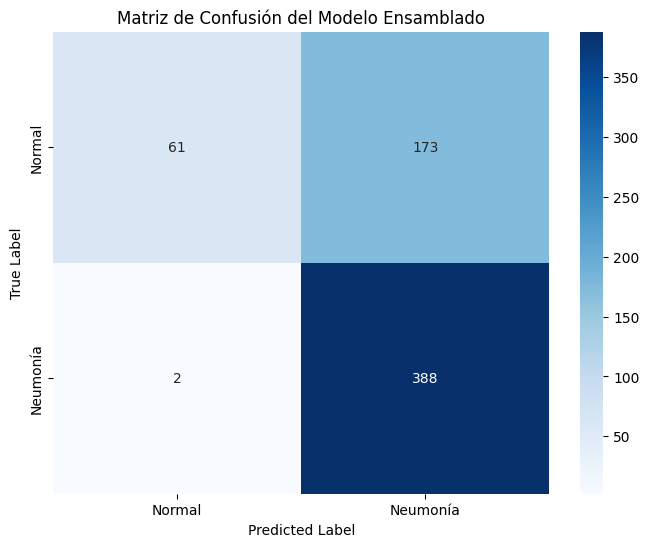

In [177]:
# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Neumonía'], yticklabels=['Normal', 'Neumonía'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusión del Modelo Ensamblado')
plt.show()

**INTERPRETACIÓN MATRIZ DE CONFUSIÓN:**

**En la diagonal principal de la matriz de confusión se encuentran los valores de las predicciones correctas. El gráfico muestra la distribución de las predicciones del modelo ensamblado en un espacio bidimensional. En este caso, el espacio bidimensional está representado por las coordenadas Precisión y Sensibilidad. Tanto la mtriz de confusión como su gráfico muestra que el modelo tiene un buen rendimiento en términos de precisión y sensibilidad.**

**CONCLUSIÓN:**

**En general, el rendimiento del modelo ensamblado es bueno. El modelo es capaz de clasificar correctamente la mayoría de las imágenes, tanto positivas como negativas.**

**Sin embargo, hay algunas áreas en las que el modelo podría mejorar. Para mejorar el rendimiento del modelo, se podrían realizar los siguientes cambios:**

*   **Se podría entrenar el modelo ensamblado con un conjunto de datos más grande. Esto ayudaría al modelo a aprender a clasificar imágenes más precisa y consistentemente.**

*   **Se podría ajustar la configuración del modelo ensamblado. Por ejemplo, se podría cambiar el umbral de clasificación para mejorar la precisión o la sensibilidad.**

In [178]:
#import joblib
import pickle

In [180]:
# Guardar el modelo en formato .pkl
#joblib.dump(ensemble_predictions, 'modelo_ensamblado.pkl')

with open('modelo_ensamblado.pkl', 'wb') as file:
    pickle.dump(ensemble_predictions, file)

In [183]:
# Guardar el modelo ensamblado en formato .h5
models.save('modelo_ensamblado.h5')

C:\Python\envs\NS_env\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [184]:
# Guardar el modelo en formato nativo de Keras
models.save('modelo_ensamblado.keras')